# Notebook 08 - Regression

__[Example Notebook]__

Note: the techniques I'm using to prepare the data aren't best practices, like:

- using max-scaling to normalize data
- the way I train test split
- not shuffling the test data

I'm just using quick and easy ways to prepare this data for use in the model, our goal here is just to showcase a working neural network :)

In [19]:
import kaitorch

from kaitorch.models import Sequential
from kaitorch.layers import Dense, Dropout
from kaitorch.activations import LeakyReLU
from kaitorch.optimizers import SGD
from kaitorch.losses import MeanSquaredError
from kaitorch.graph import plot_model

In [27]:
import pandas as pd
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [28]:
X = [list(features[:4]) for features in data['data']]
y = data['target']

<AxesSubplot:>

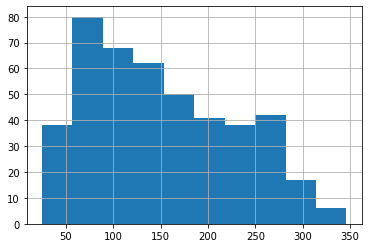

In [29]:
pd.Series(y).hist()

In [30]:
mask = (y > 100) & (y <= 200)
X = [x for (x, mask) in zip(X, mask) if mask == True]
y = y[mask]/200

<AxesSubplot:>

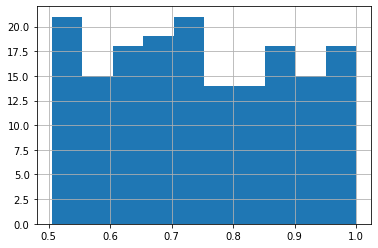

In [31]:
pd.Series(y).hist()

In [24]:
len(X)

173

In [32]:
X_train = list(X[:150])
y_train = list(y[:150])

X_test = list(X[150:])
y_test = list(y[150:])

In [33]:
import random

shuffled_order = list(range(len(X_train)))
random.shuffle(shuffled_order)

In [34]:
X_train = [X_train[i] for i in shuffled_order]
y_train = [y_train[i] for i in shuffled_order]

In [44]:
model = Sequential()

model.add(Dense(16, activation=LeakyReLU(alpha=0.01), initializer='he_uniform'))
model.add(Dense(16, activation=LeakyReLU(alpha=0.01), initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(16, activation=LeakyReLU(alpha=0.01), initializer='he_uniform'))
model.add(Dense(16, activation=LeakyReLU(alpha=0.01), initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(16, activation=LeakyReLU(alpha=0.01), initializer='he_uniform'))
model.add(Dense(6, activation=LeakyReLU(alpha=0.01), initializer='he_uniform'))
model.add(Dense(1))

model.compile(
    optimizer=kaitorch.optimizers.SGD(lr=0.01),
    loss=kaitorch.losses.MeanSquaredError()
)

In [45]:
model.build(input_size=4)
model.summary()

___________________________________________________________________________________________________________________
Layer (params)                                                           Output Shape     Params = Weights + Biases
Dense(units=16, activation=LeakyReLU(α=0.01), initializer=he_uniform)    (None, 16)       80       64        16    
___________________________________________________________________________________________________________________
Dense(units=16, activation=LeakyReLU(α=0.01), initializer=he_uniform)    (None, 16)       272      256       16    
___________________________________________________________________________________________________________________
Dropout(dropout_rate=0.2)                                                (None, 16)       0        0         0     
___________________________________________________________________________________________________________________
Dense(units=16, activation=LeakyReLU(α=0.01), initializer=he_uniform)   

In [46]:
%%time
history = model.fit(X_train, y_train, epochs=10)

Epoch  10/10: 100%|████████████████████████████████████████| 150/150 [00:05<00:00, Train Loss: 0.0834]


CPU times: user 1min 7s, sys: 3.67 s, total: 1min 11s
Wall time: 1min 14s


In [47]:
y_pred = model.predict(X_test)
y_pred

Epoch   1/1: 100%|████████████████████████████████████████| 23/23 [00:04<00:00, Eval]


[0.68494408092614,
 0.673175856069218,
 0.6046590227922669,
 0.6474924475992423,
 0.6580018391481497,
 0.689146766118369,
 0.5466318038986371,
 0.7099830116522015,
 0.6319180091494099,
 0.6403029784421712,
 0.7122072332771159,
 0.7306818907077303,
 0.5755422499897783,
 0.7136160008098933,
 0.6644506746592922,
 0.6165544112915432,
 0.7481221476036245,
 0.617810514474268,
 0.7070537847197216,
 0.7042522016180319,
 0.6137978618796764,
 0.6328571165270731,
 0.6064811045042819]

In [48]:
y_test

[0.52,
 0.66,
 0.55,
 0.59,
 0.99,
 0.875,
 0.84,
 0.7,
 0.945,
 0.905,
 0.68,
 0.565,
 0.655,
 0.87,
 0.73,
 0.555,
 0.76,
 0.6,
 0.915,
 0.865,
 0.89,
 0.52,
 0.66]

In [43]:
list(zip(y_test, y_pred))

[(0.52, 0.48908722230293594),
 (0.66, 0.6131444009260177),
 (0.55, 0.5942762284789918),
 (0.59, 0.5484455900745054),
 (0.99, 0.5693044533381245),
 (0.875, 0.652525088963686),
 (0.84, 0.582585185882988),
 (0.7, 0.613976555514797),
 (0.945, 0.6123524514625867),
 (0.905, 0.5884502958275108),
 (0.68, 0.5849577609715605),
 (0.565, 0.5438691525995294),
 (0.655, 0.605369854747896),
 (0.87, 0.5451288453276013),
 (0.73, 0.55726868881047),
 (0.555, 0.5751628643339932),
 (0.76, 0.4805742259638366),
 (0.6, 0.5787922973720054),
 (0.915, 0.5059549009522635),
 (0.865, 0.5994067383220153),
 (0.89, 0.622578686067385),
 (0.52, 0.5547656650044266),
 (0.66, 0.5783910528616124)]

In [ ]:
class Hi:
    def __init__(self):
        pass
    
    def __repr__(self):
        return 'there'

    def __str__(self):
        return 'here'
    

In [ ]:
a = Hi()

In [ ]:
print(a.__repr__())